<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT3/T5/Ayoze_Gil_Sosa_Act_3_5_Vine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ayoze Gil Sosa

# Importación de librerías

In [1]:
# Libreías para trabajar con ficheros
import joblib
# Librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías para trabajar con modelos de entranamiento
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import KFold
# Librerías de los modelos a comparar
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
wine_quality.metadata

{'uci_id': 186,
 'name': 'Wine Quality',
 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality',
 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv',
 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 4898,
 'num_features': 11,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['quality'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Wed Nov 15 2023',
 'dataset_doi': '10.24432/C56S3T',
 'creators': ['Paulo Cortez',
  'A. Cerdeira',
  'F. Almeida',
  'T. Matos',
  'J. Reis'],
 'intro_paper': {'title': 'Modeling wine preferences 

In [4]:
# metadata
wine_quality.variables

name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  None             no  
2                     None  None             no  
3                     None  None             no  
4                     None  None             no  
5                     None  None             no  
6                     None  None             no  
7                     None  None             no  
8                     None  None             no  
9                     None  None             no  
10                    None  None             no  
11  score between 0 and 10  None             no  
12            red or white  None             no

In [5]:
data = wine_quality.data.original
data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [6]:
data['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [7]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

Filtramos vinos rojos

In [8]:
data = data[data['color'] == 'red']
data = data.drop('color', axis=1)
data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# Variables y parámetros

# Tratamiento del conjunto de datos

1. Se comprueban las diferentes categorías disponibles
2. Se eliminan aquellas filas que contengan valores NaN y null
3. Se eliminan las columnas seleccionadas
4. Se transforman (a valores categóricos) o eliminan las columnas no numéricas
5. Se escalan las columnas seleccionadas

In [9]:
# Conjunto de datos y campo a predecir
df = data.copy()
field_name = "quality"
field_categories = df[field_name].unique()

# Transformar las columnas con datos no númericos a valores categóricos
all_columns_to_categorical = False
field_name_to_categorical = False

# Columnas a eliminar
# Nota: Se eliminan las columnas no numéricas automáticamente
columns_to_discard = []

# Columnas a escalar
columns_to_minmax_scale = []
columns_to_standard_scale = []
#Nota: ComplementNB, MultinomialNB y CategoricalNB no admiten valores negativos

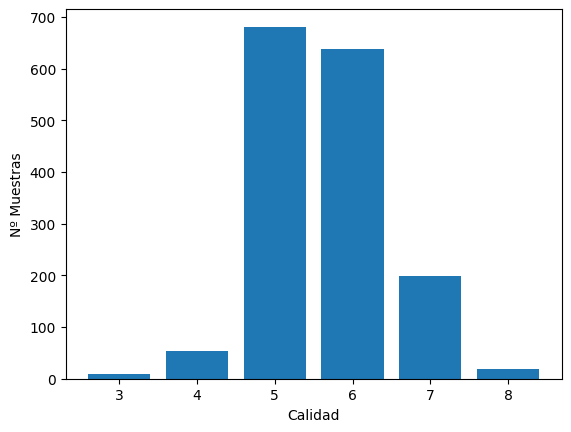

In [10]:
##########
# PASO 1 #
##########

# Visualización de registros de cada categoría
samples = df['quality'].value_counts()
plt.bar(samples.index, samples.values);
plt.xlabel('Calidad')
plt.ylabel('Nº Muestras')
plt.show()

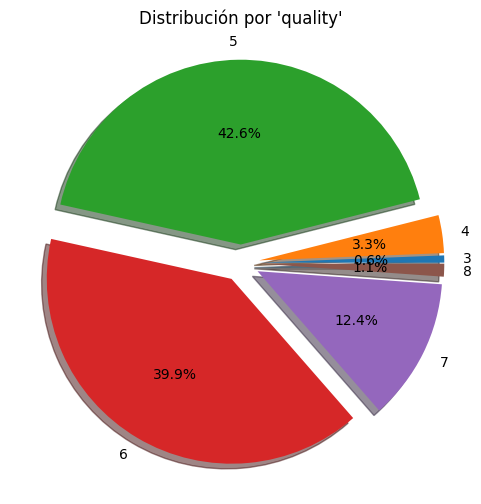

In [96]:
porc = df['quality'].value_counts(normalize = True).sort_index()

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(porc, labels=porc.index, autopct='%1.1f%%', shadow = True, explode = 0.1*np.ones(len(porc)));
ax.set_title("Distribución por 'quality'");

In [82]:
df['quality'].value_counts(normalize = True).sort_index()

3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: quality, dtype: float64

Se comprueba que no hay valores con Nan ni null, por lo que no se eliminarán filas

In [11]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [12]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [13]:
pd.merge(df.isnull().sum().to_frame(), df.isna().sum().to_frame(), left_index=True, right_index=True, suffixes=('Nº_Null', 'Nº_Nan'))

0Nº_Null  0Nº_Nan
fixed_acidity                0        0
volatile_acidity             0        0
citric_acid                  0        0
residual_sugar               0        0
chlorides                    0        0
free_sulfur_dioxide          0        0
total_sulfur_dioxide         0        0
density                      0        0
pH                           0        0
sulphates                    0        0
alcohol                      0        0
quality                      0        0

In [14]:
##########
# PASO 2 #
##########

# Eliminación de filas con valores NaN y reajuste de los indices
rows_before = df[field_name].value_counts()
df.dropna(inplace=True)
df.index = range(df.shape[0])
rows_after = df[field_name].value_counts()

# Visualización de registros de cada categoría
display(pd.DataFrame(pd.concat([rows_before, rows_after], axis=1, keys=["before", "after"])))
print(f"\n{rows_before.sum() - df.shape[0]} rows deleted\n")

before  after
5     681    681
6     638    638
7     199    199
4      53     53
8      18     18
3      10     10


0 rows deleted



In [15]:
##########
# PASO 3 #
##########

# Se eliminan las columnas seleccionadas
for column in columns_to_discard:
  del df[column]

##########
# PASO 4 #
##########

# Se transforman las variables no numéricas a categóricas
if all_columns_to_categorical:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == field_name and not field_name_to_categorical:
      continue
    # Comprueba las columna no numéricas para pasarlo a valores categóricos
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      types = df[column].unique()
      df[column].replace(types, range(len(types)), inplace=True);
# Se eliminan las variables no numéricas
else:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == field_name:
      continue
    # Elimina las columnas
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      del df[column]

##########
# PASO 5 #
##########

# Se escalan los datos de las columnas seleccionadas
if columns_to_minmax_scale:
  scaler = MinMaxScaler()
  df[columns_to_minmax_scale] = scaler.fit_transform(df[columns_to_minmax_scale])
if columns_to_standard_scale:
  scaler = StandardScaler()
  df[columns_to_standard_scale] = scaler.fit_transform(df[columns_to_standard_scale])

# Visualización de un registro de cada categoría antes y después
display(data.drop_duplicates(field_name, keep='first'))
print(f"{data.shape[0]} rows x {data.shape[1]} columns")

display(df.drop_duplicates(field_name, keep='first'))
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              7.4              0.70         0.00             1.9      0.076   
3             11.2              0.28         0.56             1.9      0.075   
7              7.3              0.65         0.00             1.2      0.065   
18             7.4              0.59         0.08             4.4      0.086   
267            7.9              0.35         0.46             3.6      0.078   
459           11.6              0.58         0.66             2.2      0.074   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                   11.0                  34.0   0.9978  3.51       0.56   
3                   17.0                  60.0   0.9980  3.16       0.58   
7                   15.0                  21.0   0.9946  3.39       0.47   
18                   6.0                  29.0   0.9974  3.38       0.50   
267                 15.0                  37.0   0.9973  3.35       0.86   
459                 10.0                  47.0   1.0008  3.25       0.57   

     alcohol  quality  
0        9.4        5  
3        9.8        6  
7       10.0        7  
18       9.0        4  
267     12.8        8  
459      9.0        3

1599 rows x 12 columns


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              7.4              0.70         0.00             1.9      0.076   
3             11.2              0.28         0.56             1.9      0.075   
7              7.3              0.65         0.00             1.2      0.065   
18             7.4              0.59         0.08             4.4      0.086   
267            7.9              0.35         0.46             3.6      0.078   
459           11.6              0.58         0.66             2.2      0.074   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                   11.0                  34.0   0.9978  3.51       0.56   
3                   17.0                  60.0   0.9980  3.16       0.58   
7                   15.0                  21.0   0.9946  3.39       0.47   
18                   6.0                  29.0   0.9974  3.38       0.50   
267                 15.0                  37.0   0.9973  3.35       0.86   
459                 10.0                  47.0   1.0008  3.25       0.57   

     alcohol  quality  
0        9.4        5  
3        9.8        6  
7       10.0        7  
18       9.0        4  
267     12.8        8  
459      9.0        3

1599 rows x 12 columns


# Visualización de la relación entre columnas


In [16]:
df.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.114777   0.093705            -0.153794   
volatile_acidity            0.001918   0.061298            -0.010504   
citric_acid                 0.143577   0.203823            -0.060978   
residual_sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free_sulfur_dioxide         0.187049   0.005562             1.000000   
total_sulfur_dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile_acidity                  0.076470  0.022026  0.234937  -0.260987   
citric_acid                       0.035533  0.364947 -0.541904   0.312770   
residual_sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free_sulfur_dioxide               0.667666 -0.021946  0.070377   0.051658   
total_sulfur_dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed_acidity        -0.061668  0.124052  
volatile_acidity     -0.202288 -0.390558  
citric_acid           0.109903  0.226373  
residual_sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free_sulfur_dioxide  -0.069408 -0.050656  
total_sulfur_dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

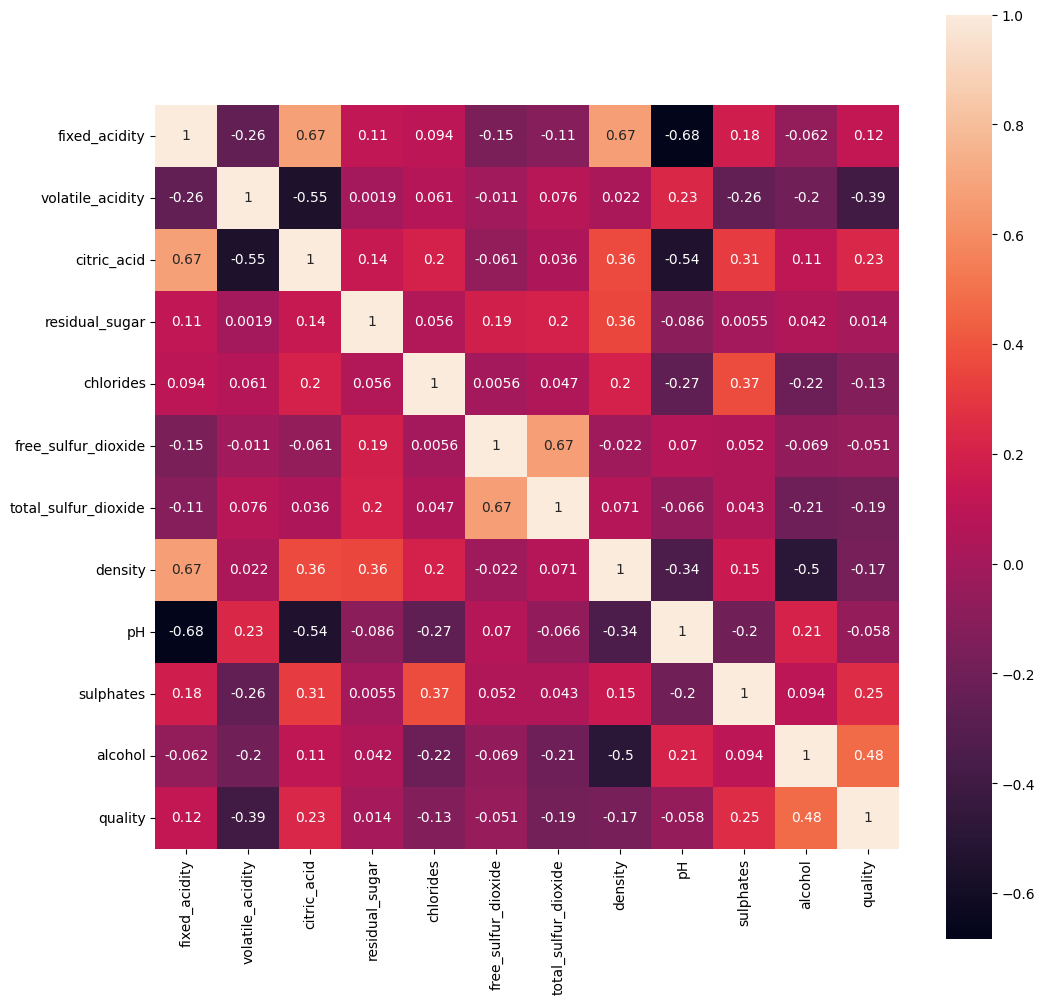

In [104]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), square=True, annot=True, ax=ax);

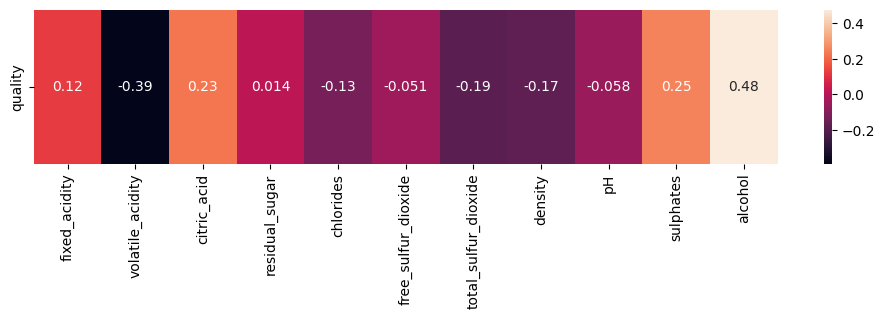

In [141]:
fig, ax = plt.subplots(figsize=(12,2))
sns.heatmap(df.corr()[field_name].drop(field_name).to_frame().T, annot=True, ax=ax);

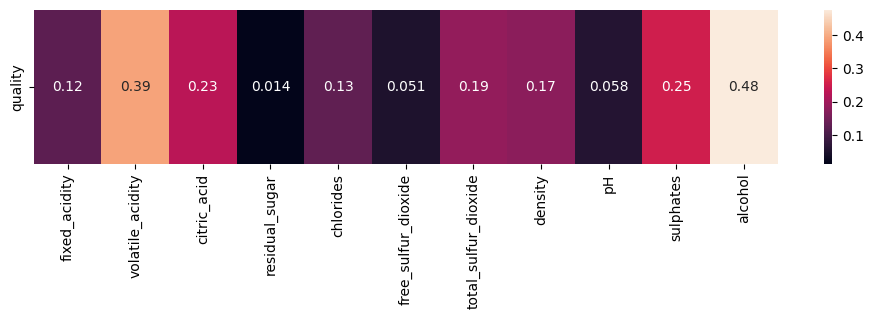

In [140]:
fig, ax = plt.subplots(figsize=(12,2))
sns.heatmap(df.corr()[field_name].drop(field_name).abs().to_frame().T, annot=True, ax=ax);

In [126]:
df.corr()[field_name].drop(field_name).abs().sort_values(ascending=False)

alcohol                 0.476166
volatile_acidity        0.390558
sulphates               0.251397
citric_acid             0.226373
total_sulfur_dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed_acidity           0.124052
pH                      0.057731
free_sulfur_dioxide     0.050656
residual_sugar          0.013732
Name: quality, dtype: float64

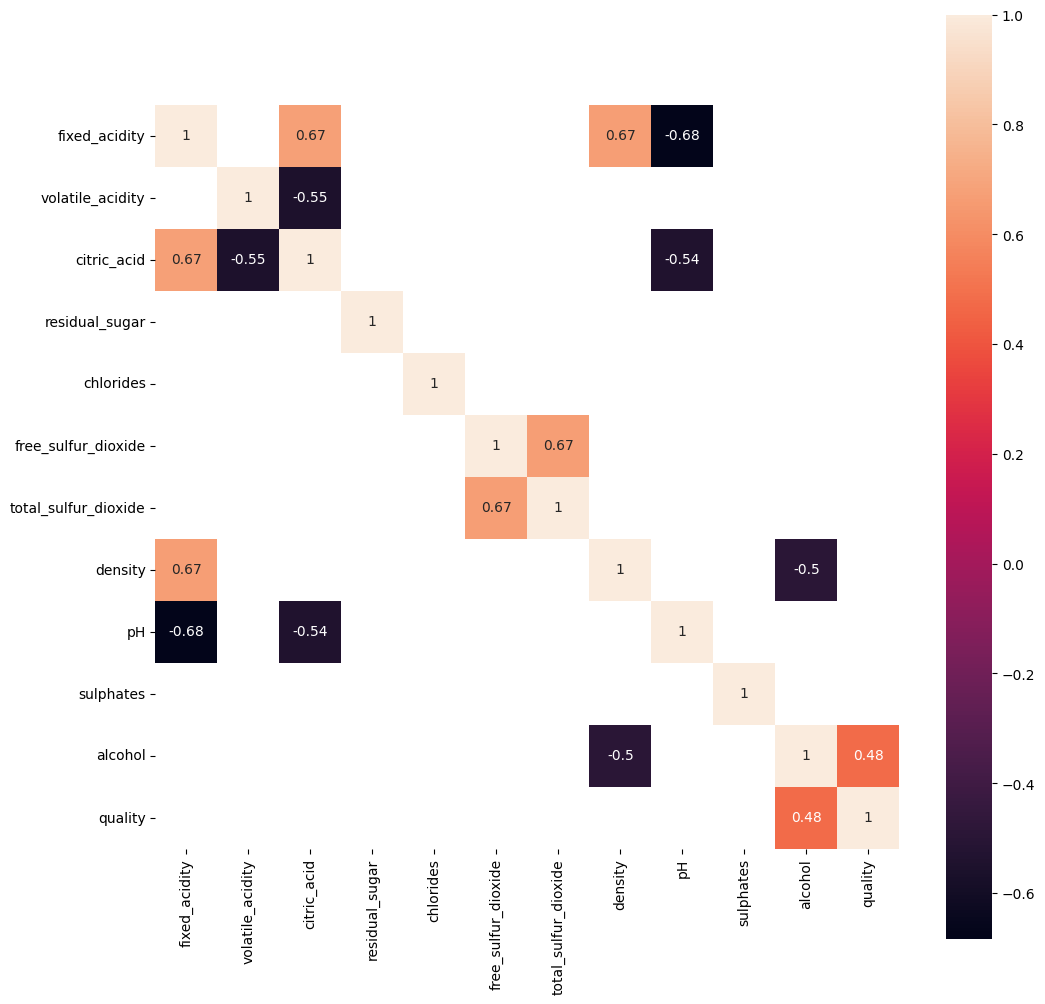

In [106]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[df.corr().abs() > 0.4], square=True, annot=True, ax=ax);

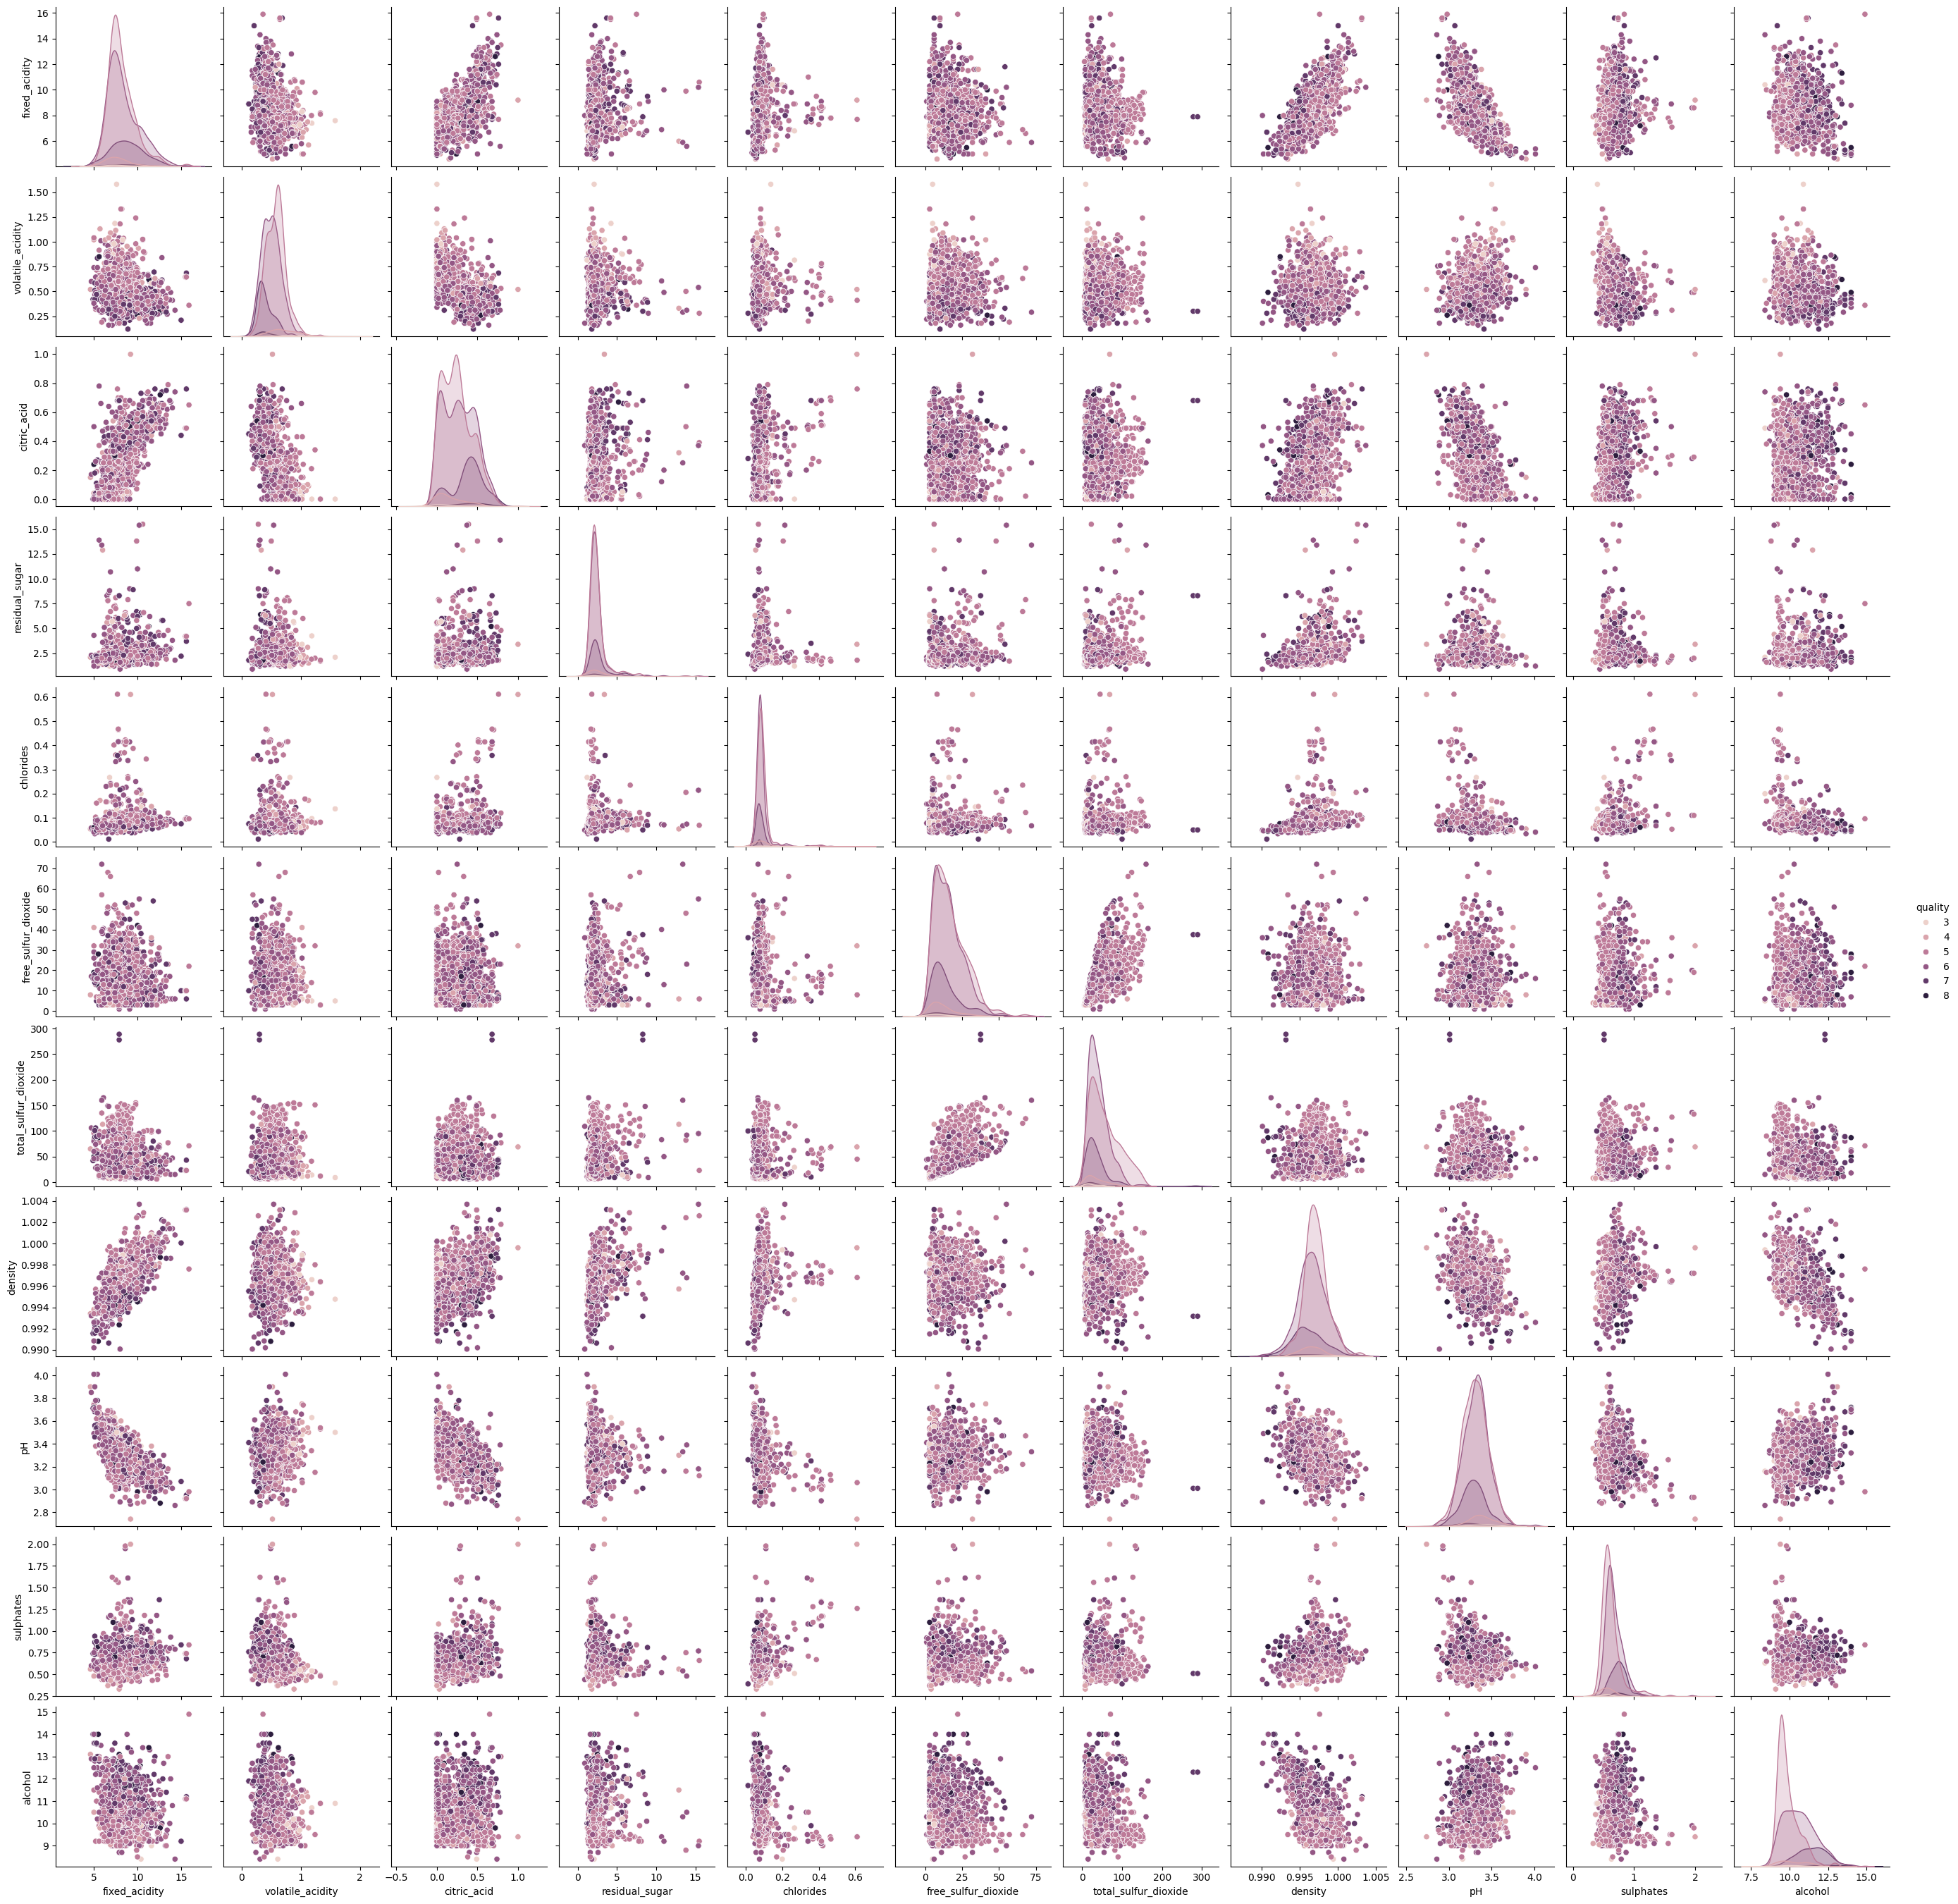

In [ ]:
# Gráfico de dispersión que muestra la relación entre las variables numéricas.
sns.pairplot(df, hue=field_name)

!!!OJO CON CHI2!!!

In [18]:
# Crear el objeto SelectKBest con la función de prueba chi-cuadrado
k_best = SelectKBest(score_func=chi2, k='all')

# Aplicar la transformación a tus datos
k_best.fit_transform(df.drop(field_name, axis=1), df[field_name])

# Obtener las puntuaciones de las características y los índices de las características seleccionadas
feature_scores = pd.DataFrame({'Feature': df.drop(field_name, axis=1).columns, 'Score': k_best.scores_})

# Ordenar las características por puntuación en orden descendente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Obtener los índices de las características seleccionadas después de la ordenación
selected_features_indices = k_best.get_support(indices=True)

# Imprimir las puntuaciones y las características seleccionadas
print("Puntuaciones de características:")
print(feature_scores)

Puntuaciones de características:
                 Feature        Score
6   total_sulfur_dioxide  2755.557984
5    free_sulfur_dioxide   161.936036
10               alcohol    46.429892
1       volatile_acidity    15.580289
2            citric_acid    13.025665
0          fixed_acidity    11.260652
9              sulphates     4.558488
3         residual_sugar     4.123295
4              chlorides     0.752426
8                     pH     0.154655
7                density     0.000230


In [19]:
# Crear el objeto SelectKBest con la función de prueba chi-cuadrado
k_best = SelectKBest(k='all')

# Aplicar la transformación a tus datos
k_best.fit_transform(df.drop(field_name, axis=1), df[field_name])

# Obtener las puntuaciones de las características y los índices de las características seleccionadas
feature_scores = pd.DataFrame({'Feature': df.drop(field_name, axis=1).columns, 'Score': k_best.scores_})

# Ordenar las características por puntuación en orden descendente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Obtener los índices de las características seleccionadas después de la ordenación
selected_features_indices = k_best.get_support(indices=True)

# Imprimir las puntuaciones y las características seleccionadas
print("Puntuaciones de características:")
print(feature_scores)

Puntuaciones de características:
                 Feature       Score
10               alcohol  115.854797
1       volatile_acidity   60.913993
6   total_sulfur_dioxide   25.478510
9              sulphates   22.273376
2            citric_acid   19.690664
7                density   13.396357
0          fixed_acidity    6.283081
4              chlorides    6.035639
5    free_sulfur_dioxide    4.754233
8                     pH    4.341764
3         residual_sugar    1.053374


In [ ]:
print("Columna -> Skewness | Kurtosis")
for column in df.drop([field_name],axis=1).columns:
    print(f"{column} ->  {df[column].skew()} |  {df[column].kurt()} ")

Columna -> Skewness | Kurtosis
fixed_acidity ->  0.9827514413284587 |  1.1321433977276252 
volatile_acidity ->  0.6715925723840199 |  1.2255422501791422 
citric_acid ->  0.3183372952546368 |  -0.7889975153633966 
residual_sugar ->  4.54065542590319 |  28.617595424475443 
chlorides ->  5.680346571971724 |  41.71578724757661 
free_sulfur_dioxide ->  1.250567293314441 |  2.023562045840575 
total_sulfur_dioxide ->  1.515531257594554 |  3.8098244878645744 
density ->  0.07128766294927483 |  0.9340790654648123 
pH ->  0.19368349811284427 |  0.806942508246574 
sulphates ->  2.4286723536602945 |  11.720250727147674 
alcohol ->  0.8608288069184189 |  0.20002931143836733 


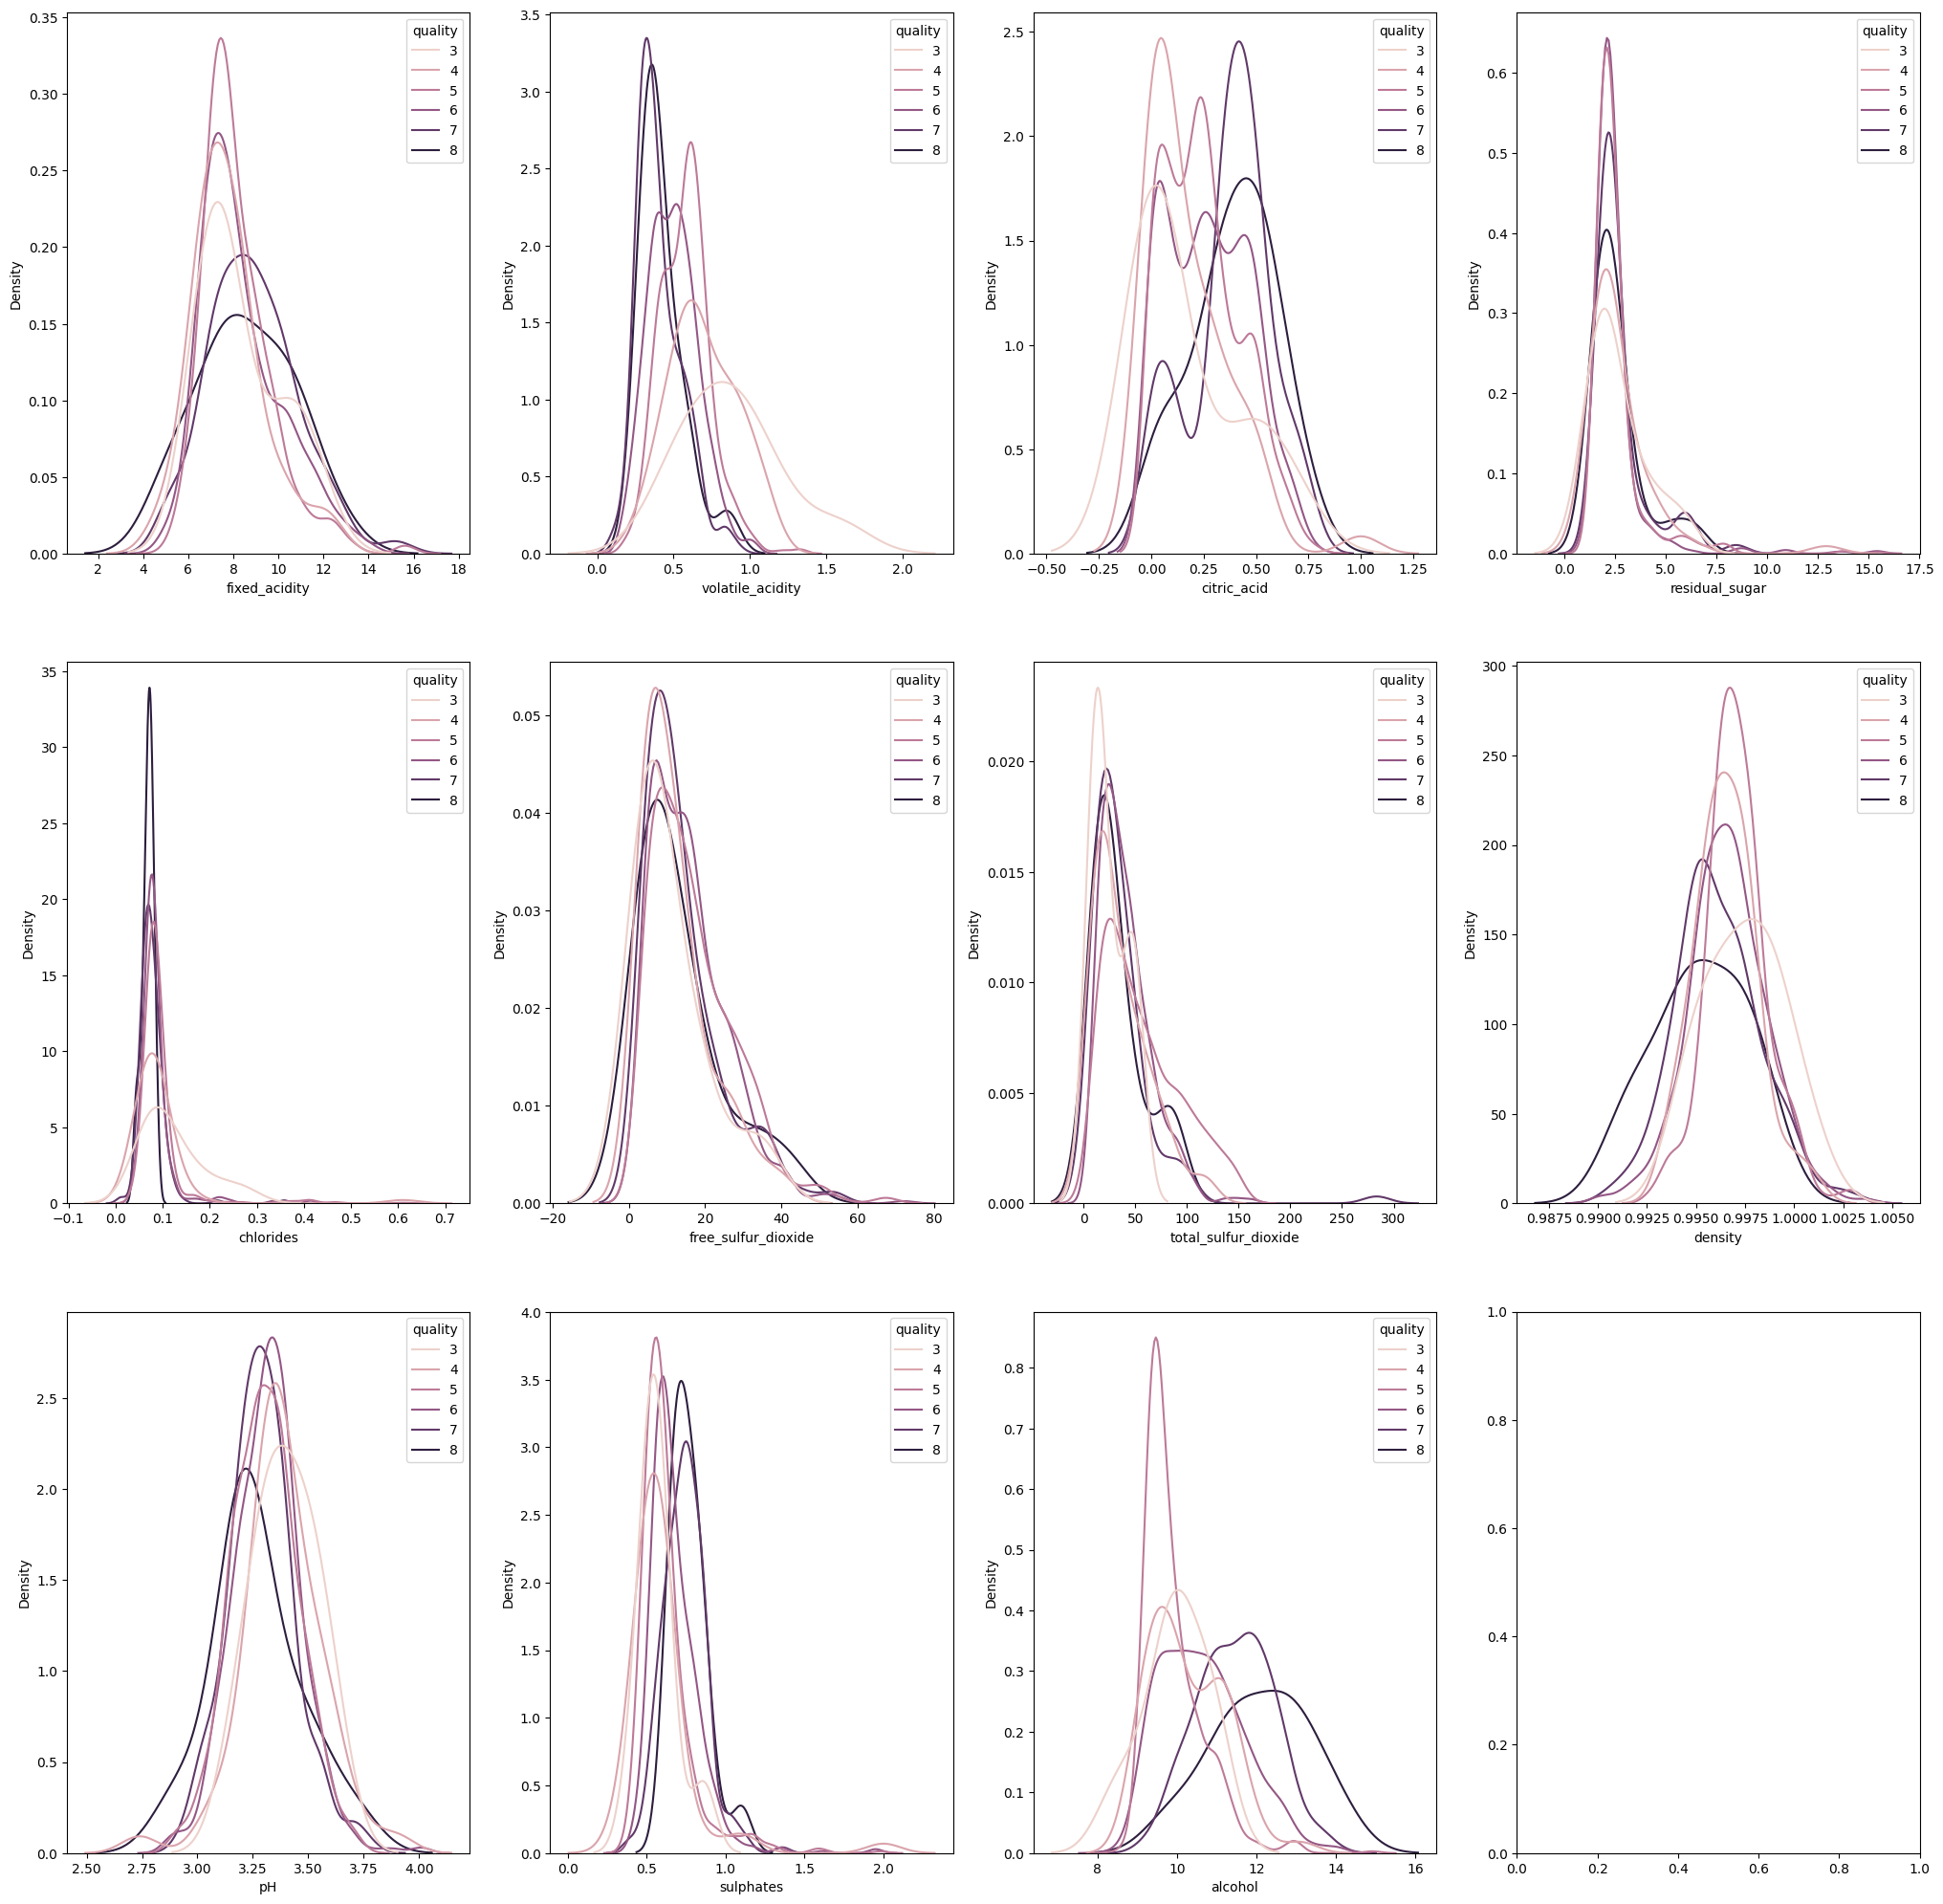

In [ ]:
# Gráfico de distribución kde de cada caldiad por cada variable dependiente
cols = df.columns

fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/4)), ncols = 4, figsize = (25, 25))

i,j = 0,0
for c in cols:
  if c != field_name:
    sns.kdeplot(df, x=c, hue=field_name, common_norm=False, fill=False, ax=ax[i, j], legend=True)

    j+=1
    if j==4:
        i+=1
        j=0

plt.show();

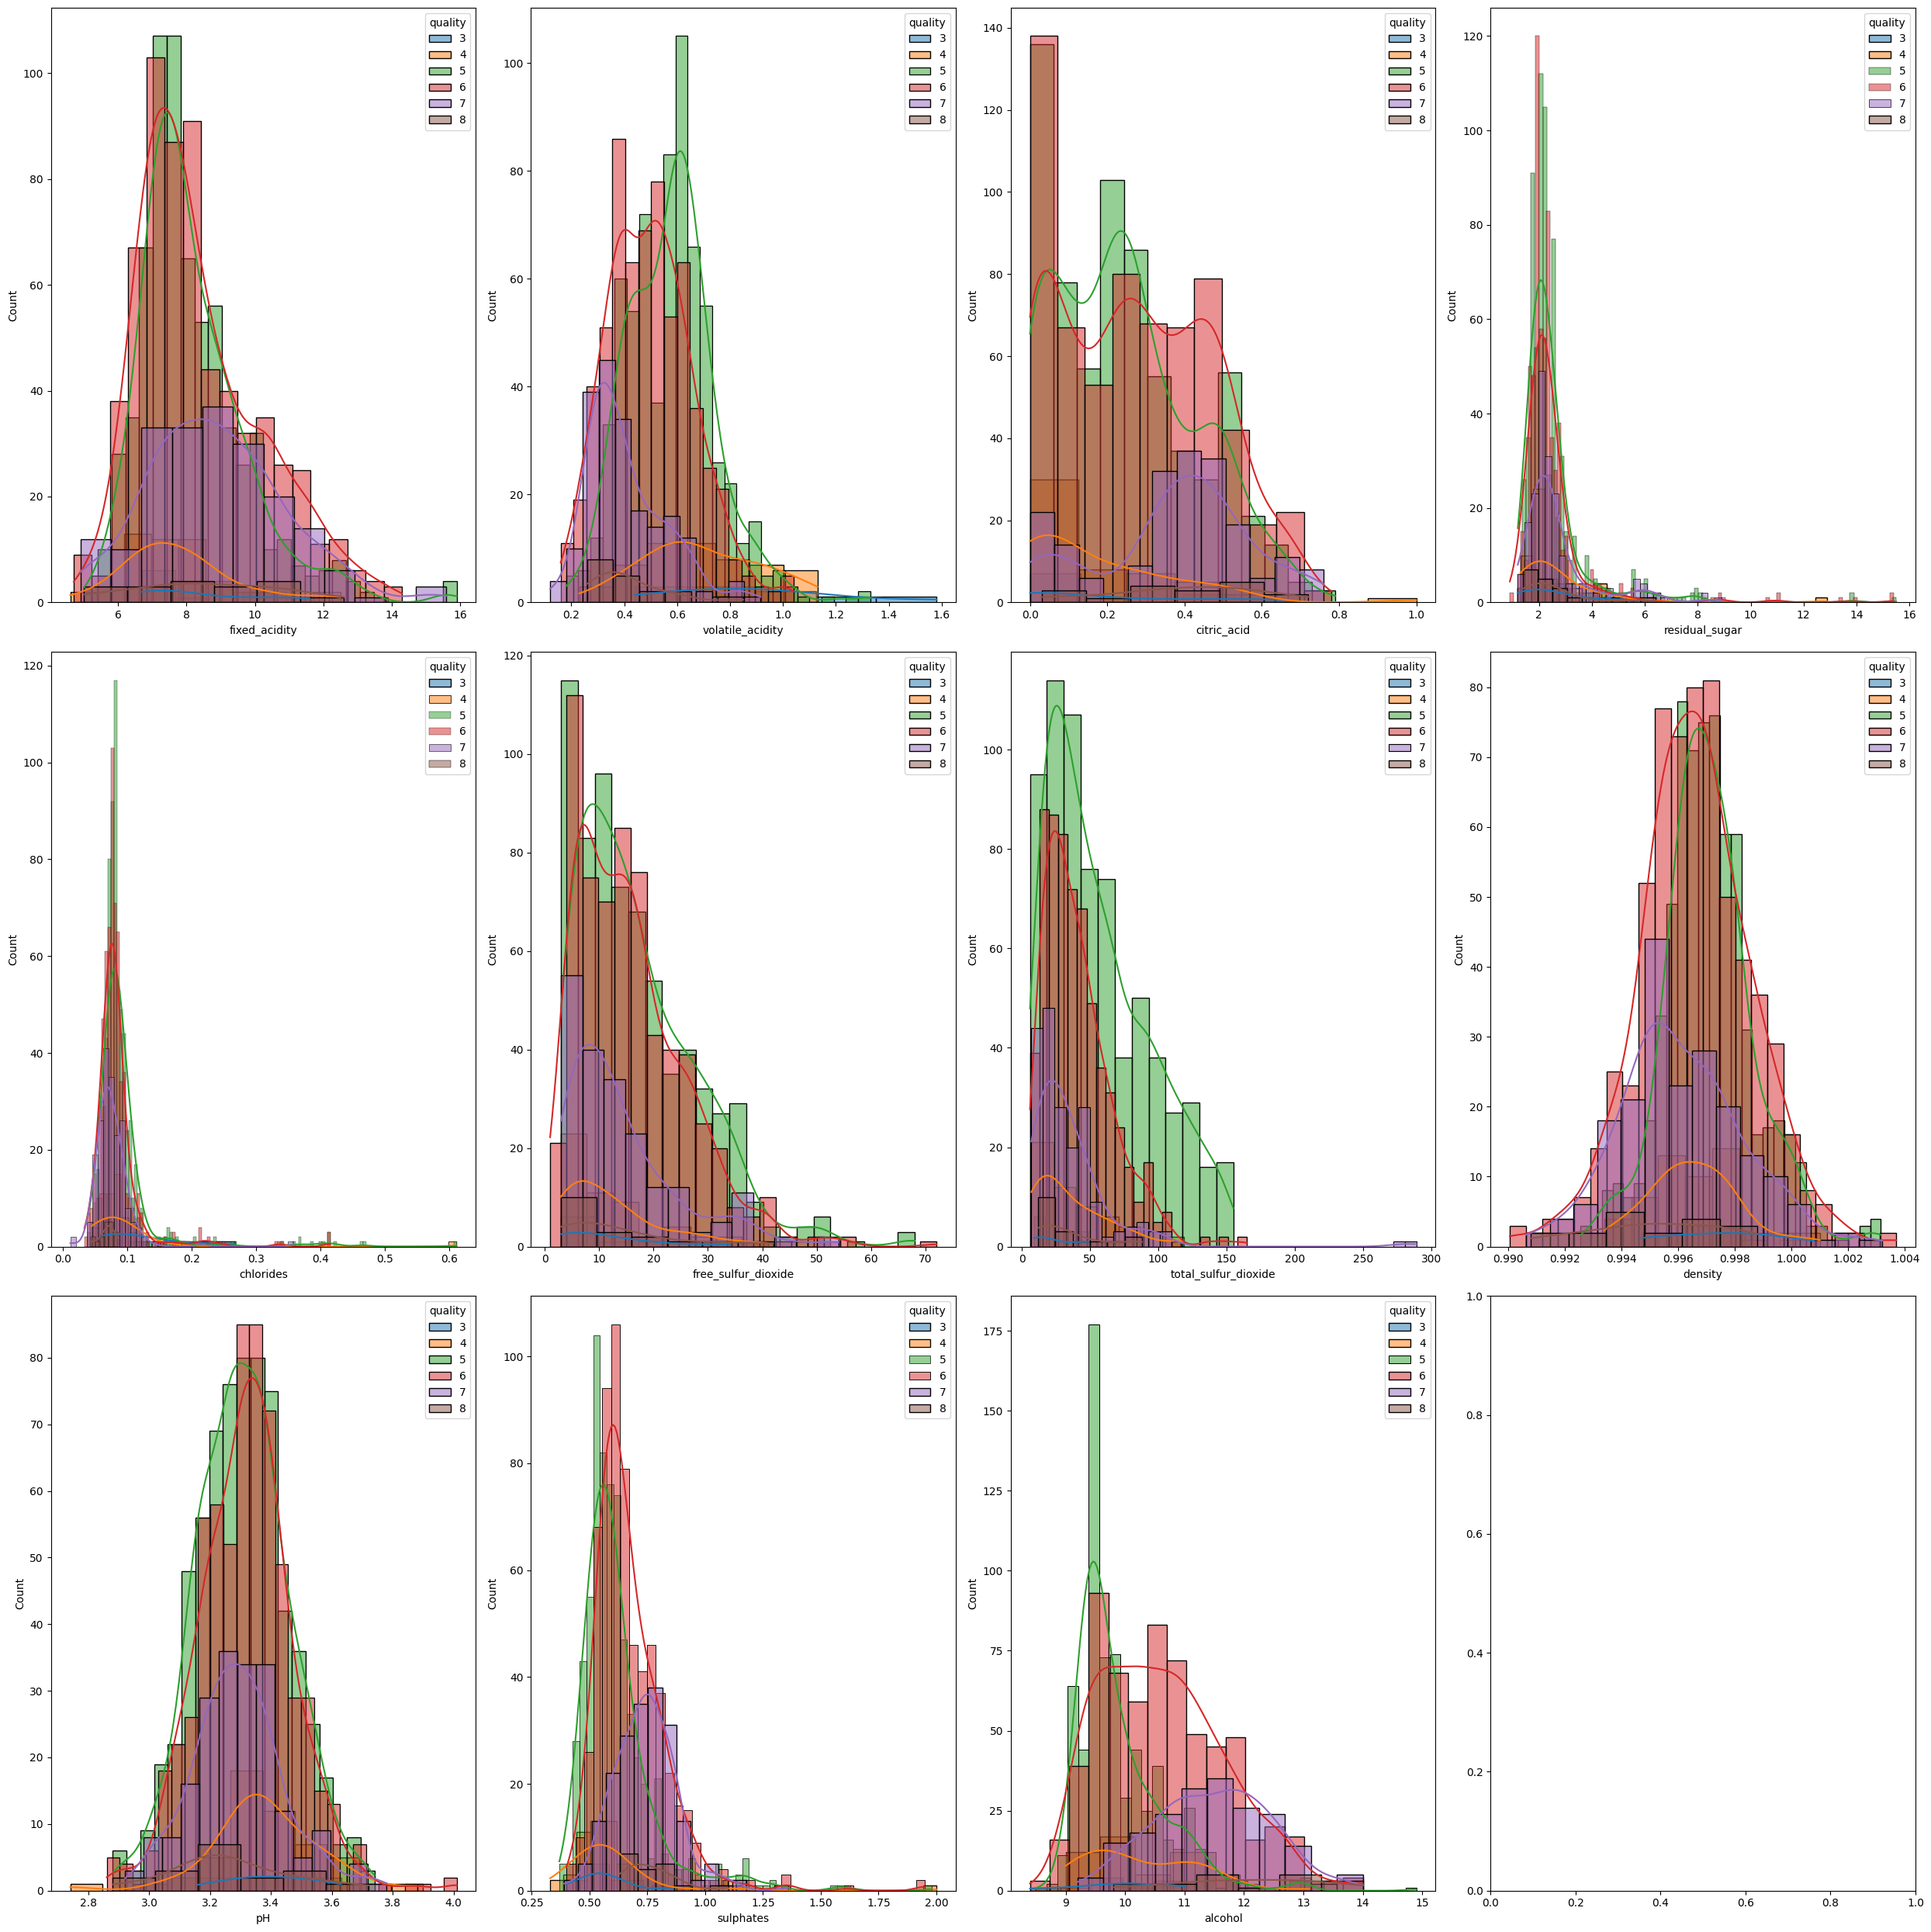

In [60]:
# Historgrama y kde de cada calidad por cada variable dependiente
cols = df.columns

fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/4)), ncols = 4, figsize = (25, 25))

i,j = 0,0
for c in cols:
  if c != field_name:
    #for q in df['quality'].unique():
    for q in np.sort(df['quality'].unique()):
      sns.histplot(df.query('quality == '+ str(q))[c], kde = True, ax = ax[i,j], label = q)

    #Se reordenan los valores de la leyenda de menor a mayor por la calidad.
    #handles, labels = ax[i,j].get_legend_handles_labels()
    #labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0])))
    #ax[i,j].legend(handles, labels, title='quality')

    ax[i,j].legend(title='quality')

    j+=1
    if j==4:
        i+=1
        j=0

plt.tight_layout();

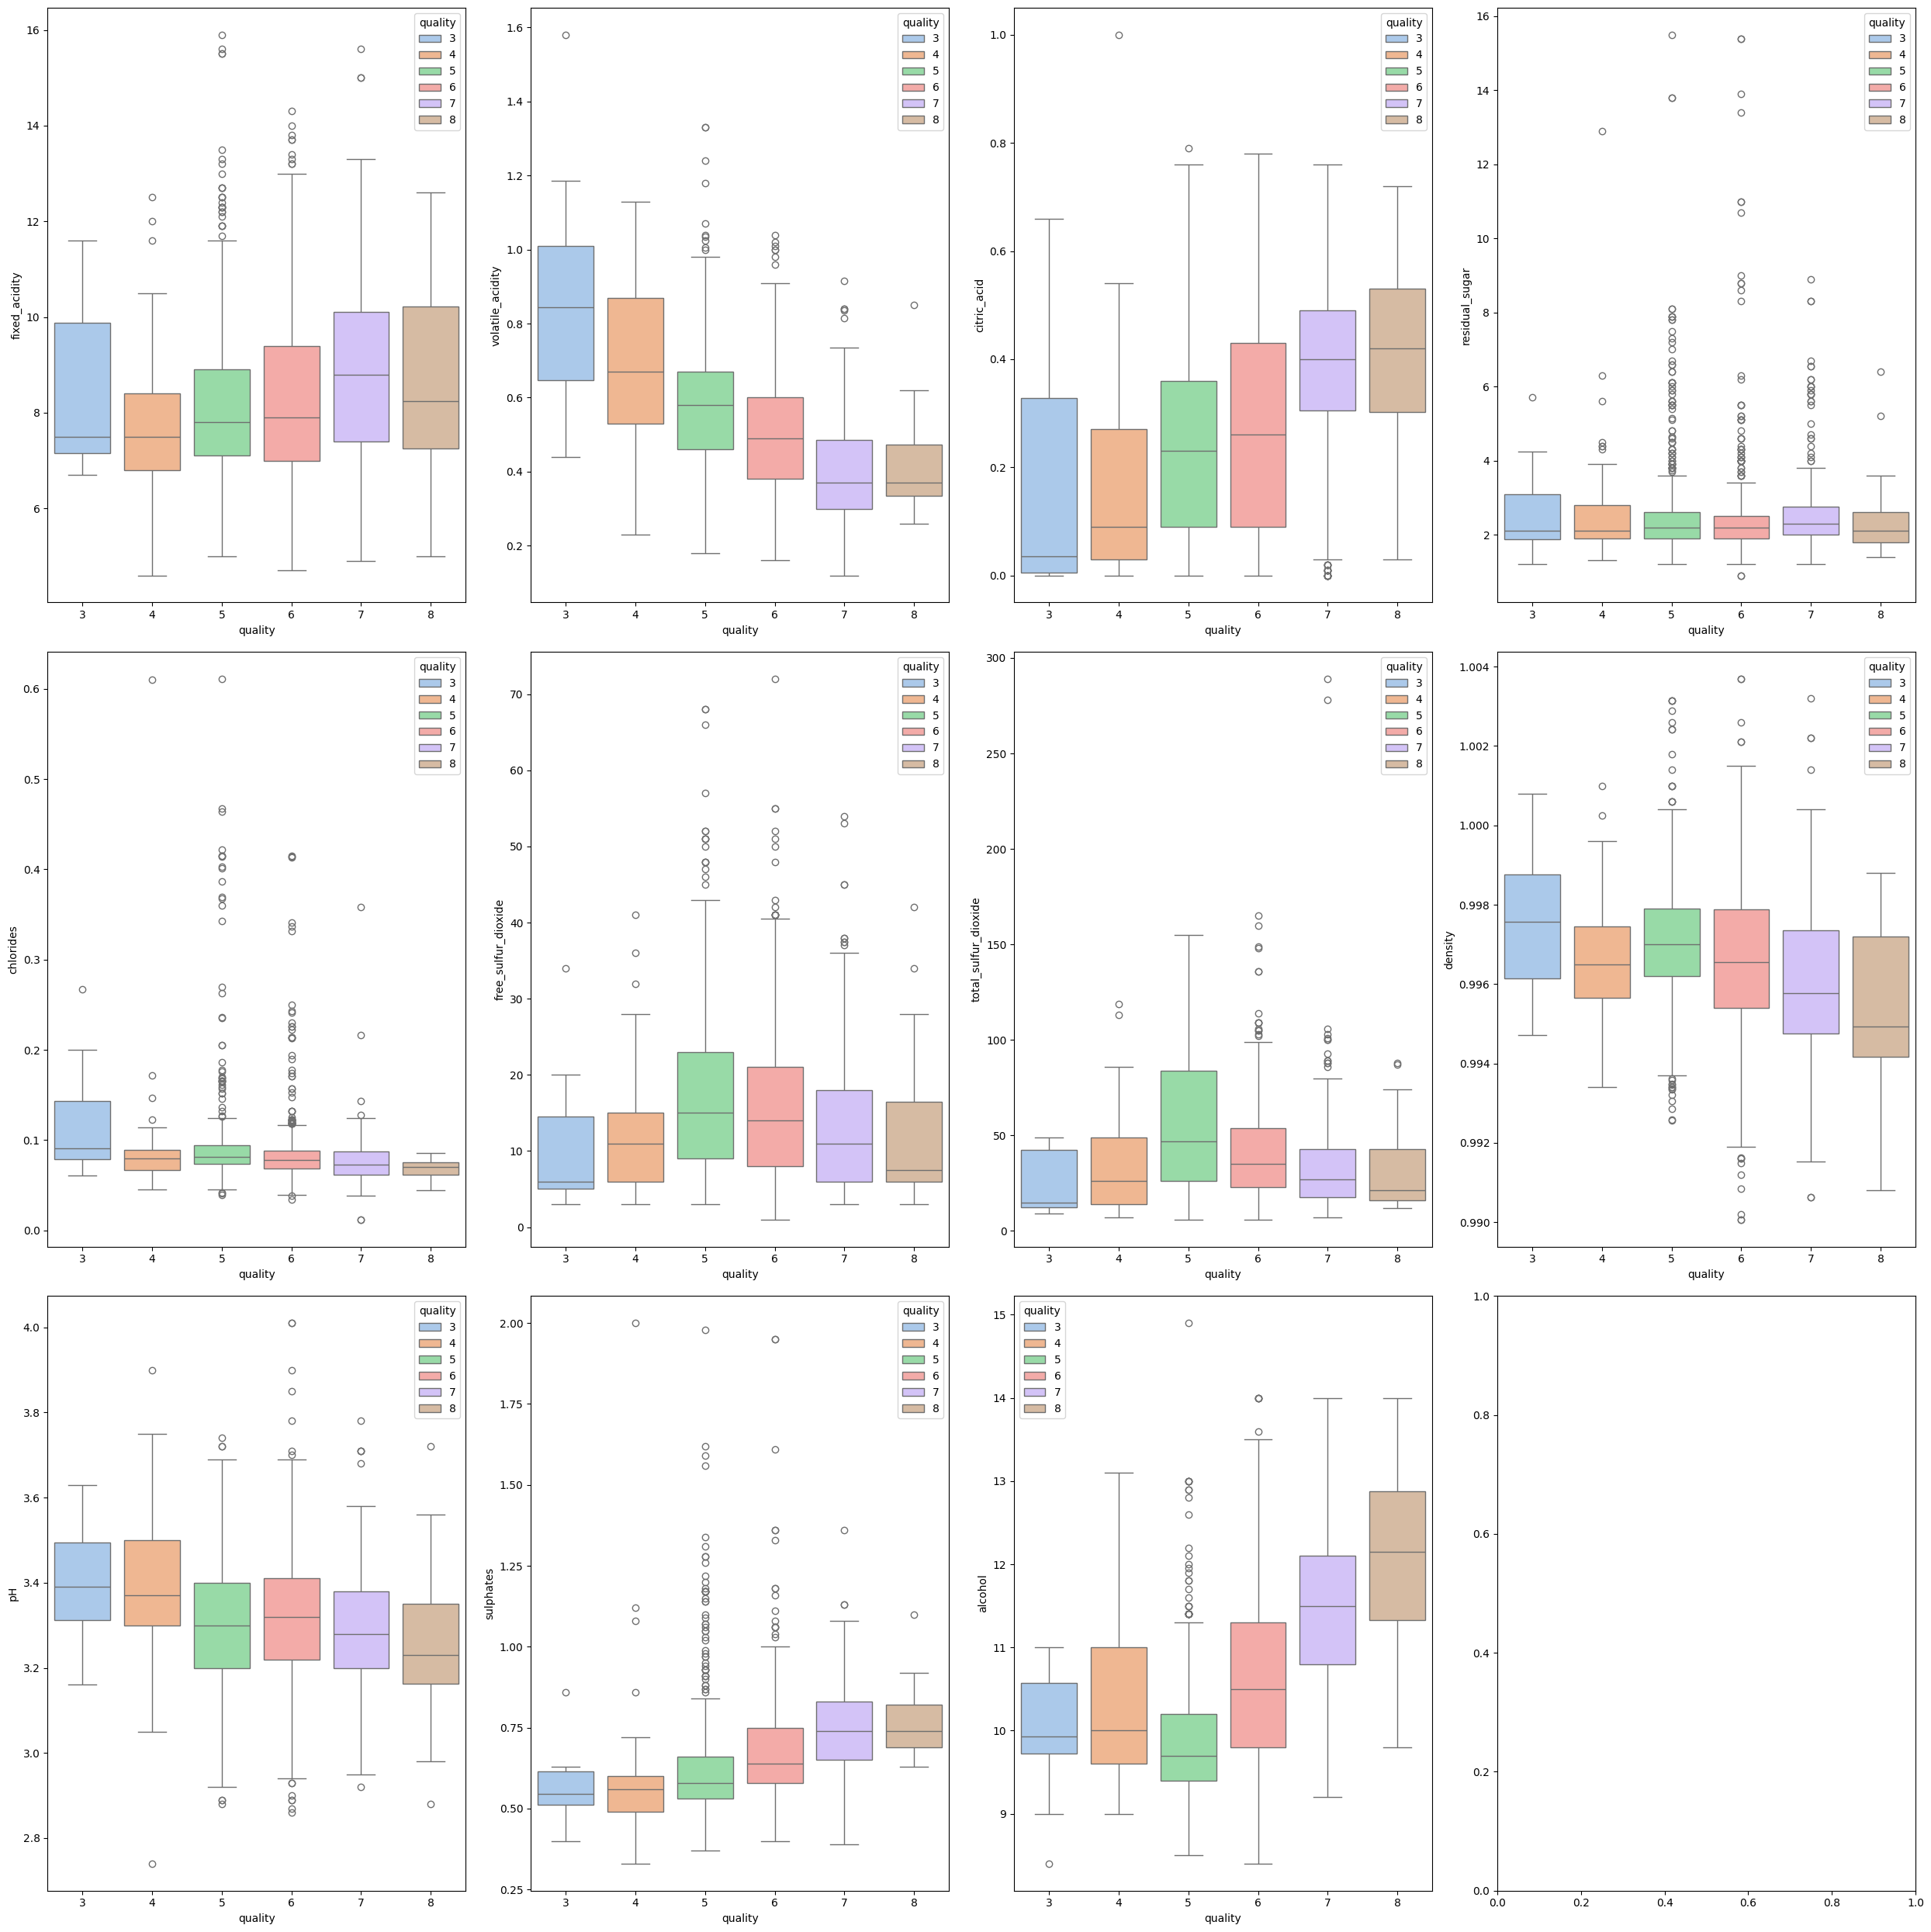

In [64]:
# Gráfico de cajas de cada calidad por cada variable dependiente
cols = df.columns

fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/4)), ncols = 4, figsize = (25, 25))

i,j = 0,0
for c in cols:
  if c != field_name:
    sns.boxplot(x = field_name, y = c, hue = field_name, data = df, ax = ax[i,j], palette='pastel')

    j+=1
    if j==4:
        i+=1
        j=0

plt.tight_layout();

Selección de características

In [ ]:
df = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

# Visualización de un registro de cada categoría
display(df.drop_duplicates(field_name, keep='first'))
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              7.4              0.70         0.00             1.9      0.076   
3             11.2              0.28         0.56             1.9      0.075   
7              7.3              0.65         0.00             1.2      0.065   
18             7.4              0.59         0.08             4.4      0.086   
267            7.9              0.35         0.46             3.6      0.078   
459           11.6              0.58         0.66             2.2      0.074   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                   11.0                  34.0   0.9978  3.51       0.56   
3                   17.0                  60.0   0.9980  3.16       0.58   
7                   15.0                  21.0   0.9946  3.39       0.47   
18                   6.0                  29.0   0.9974  3.38       0.50   
267                 15.0                  37.0   0.9973  3.35       0.86   
459                 10.0                  47.0   1.0008  3.25       0.57   

     alcohol  quality  
0        9.4        5  
3        9.8        6  
7       10.0        7  
18       9.0        4  
267     12.8        8  
459      9.0        3

1599 rows x 12 columns


Escalado de las columnas seleccionadas. (OMITIR)

In [ ]:
#Se escala las columnas seleccionadas a excepción de la variable
scaler = MinMaxScaler()
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
scaler.fit(df[columns])
df[columns] = scaler.transform(df[columns])

# Visualización de un registro de cada categoría
display(df.drop_duplicates(field_name, keep='first'))
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         0.247788          0.397260         0.00        0.068493   0.106845   
3         0.584071          0.109589         0.56        0.068493   0.105175   
7         0.238938          0.363014         0.00        0.020548   0.088481   
18        0.247788          0.321918         0.08        0.239726   0.123539   
267       0.292035          0.157534         0.46        0.184932   0.110184   
459       0.619469          0.315068         0.66        0.089041   0.103506   

     free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0               0.140845              0.098940  0.567548  0.606299   0.137725   
3               0.225352              0.190813  0.582232  0.330709   0.149701   
7               0.197183              0.053004  0.332599  0.511811   0.083832   
18              0.070423              0.081272  0.538179  0.503937   0.101796   
267             0.197183              0.109541  0.530837  0.480315   0.317365   
459             0.126761              0.144876  0.787812  0.401575   0.143713   

      alcohol  quality  
0    0.153846        5  
3    0.215385        6  
7    0.246154        7  
18   0.092308        4  
267  0.676923        8  
459  0.092308        3

1599 rows x 12 columns


Exportación del fichero MinMaxScaler.pkl con el scaler entrenado.

In [ ]:
#Se exporta el scaler entrenado a un fichero pkl.
joblib.dump(scaler, open('MinMaxScaler.pkl', 'wb'))

# Entrenamiento del modelo con Cross Validation

1. Se separan datos de entrada y de salida
2. Se separan datos de entrenamiento y test
3. Se eligen los mejores árboles
3. Se instancia el modelo
4. Se usa cross validation para extraer datos de validación de los datos de entrenamiento
5. Se entrena en el modelo con los datos de entrenamiento
6. Se predice el target para los datos de validación
7. Se realiza la evaluación del modelo

# Entrenamiento del modelo

1. Se separan datos de entrada y de salida
2. Se separan datos de entrenamiento y test
3. Se instancia el modelo
4. Se usa cross validation para extraer datos de validación de los datos de entrenamiento
5. Se entrena en el modelo con los datos de entrenamiento
6. Se predice el target para los datos de validación
7. Se realiza la evaluación del modelo

In [ ]:
##########
# PASO 1 #
##########

# Se separan los datos de entrada y salida
X = df.drop(field_name, axis=1)
y = df[field_name]
display(X)

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Rings  
0           0.1500     15  
1           0.0700      7  
2           0.2100      9  
3           0.1550     10  
4           0.0550      7  
...            ...    ...  
4172        0.2490     11  
4173        0.2605     10  
4174        0.3080      9  
4175        0.2960     10  
4176        0.4950     12  

[4177 rows x 8 columns]

In [ ]:
##########
# PASO 2 #
##########

# Se separan datos de train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1)

# Visualización de registros de cada categoría
train_samples = ytrain.value_counts()
test_samples = ytest.value_counts()
samples = pd.concat([train_samples, train_samples/len(ytrain), test_samples, test_samples/len(ytest)],
                    axis=1,
                    keys=["train", "train(%)", "test", "test(%)"])

# Editamos los índices en caso de ser valores numéricos
if field_name_to_categorical:
  samples.index = field_categories[samples.index]

samples

train  train(%)  test   test(%)
M   1014  0.362402   514  0.372734
I    908  0.324518   434  0.314721
F    876  0.313081   431  0.312545

In [ ]:
# definimos el objeto KFold para separar los datos de entrenamiento.
cv = KFold(n_splits = 5, shuffle = True, random_state=1)

# Función para entrenamiento, predicción y evaluación de un modelo.
def use_model(model_name):

  ##########
  # PASO 3 #
  ##########

  # Obtenemos la clase a partir de su nombre
  # Nota: CategoricalNB no está diseñado para datos continuos. Dará error si
  # en los datos de test hay un valor que no está en los datos de entrenamiento.
  # El parámetno min_categories indica el número de valores 'discretos' distintos
  # que existen para evitar que lo defina sólo con los datos de entramiento.
  model_class = globals()[model_name]
  if model_name == 'CategoricalNB':
    model = model_class(min_categories=((X.max()+1)*1.5).astype(int))
  else:
    model = model_class()

  fold_accuracy = []

  ##########
  # PASO 4 #
  ##########

  # División train y validación aleatoria para el número de splits
  for train_fold, validation_fold in cv.split(Xtrain):

    # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_x = Xtrain.iloc[train_fold]
    f_train_y = ytrain.iloc[train_fold]

    ##########
    # PASO 5 #
    ##########

    # Entrenamos el modelo con los datos de entrenamiento
    model.fit(f_train_x, f_train_y)

    ##########
    # PASO 6 #
    ##########

    # Predicicón de la validación
    y_model = model.predict(Xtrain.iloc[validation_fold])

    # Evaluación y cálculo de la precisión para cada iteración
    accuracy = accuracy_score(ytrain.iloc[validation_fold], y_model)
    fold_accuracy.append(accuracy)

  ##########
  # PASO 7 #
  ##########

  # Evaluación y cálculo de la precisión con cross validation
  accuracy = sum(fold_accuracy)/len(fold_accuracy)

  # Predicción de los datos de test con el modelo entrenado
  y_pred = model.predict(Xtest)
  test_accuracy = accuracy_score(y_pred, ytest)

  print(f"Modelo: {model_name}")
  print(f"Precisión del modelo: {accuracy:.2}")
  print(f"Predicción Test: {test_accuracy:.2}")
  print("---------------------")

  #print(f"accuracy: {accuracy}")
  return model, test_accuracy, y_pred

# Llamada a la función de entrenamiento para cada modelo
models = []
for i, model_name in enumerate(model_names):
  model = (list(use_model(model_name)))
  models.append(model)

Modelo: BernoulliNB
Precisión del modelo: 0.36
Predicción Test: 0.37
---------------------
Modelo: ComplementNB
Precisión del modelo: 0.48
Predicción Test: 0.46
---------------------
Modelo: GaussianNB
Precisión del modelo: 0.51
Predicción Test: 0.52
---------------------
Modelo: MultinomialNB
Precisión del modelo: 0.46
Predicción Test: 0.48
---------------------
Modelo: CategoricalNB
Precisión del modelo: 0.52
Predicción Test: 0.52
---------------------


# Visualización de resultados

1. Transformación de variables categóricas reales a valores enteros
2. Transformación de variables categóricas predichas a valores enteros
3. Visualización de la matriz de confusión

In [ ]:
##########
# PASO 1 #
##########

# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df[field_name].replace(field_categories,range(len(field_categories)), inplace=True)

def transform_to_categorical_array(y_model):
  # Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
  y_model_df= pd.DataFrame(y_model, columns = [field_name])
  y_model_df[field_name].replace(field_categories,range(len(field_categories)), inplace=True)
  # Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
  y_model_array = y_model_df[field_name].to_numpy()
  return y_model_array

In [ ]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante
# y_true     : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred     : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# classes    : ndarray   -> Los nombres de las clases/valores objetivos como array de numpy
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None,
                          fig=None,
                          ax=None):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if not fig:
      fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=titleSup,
           ylabel='True label',
           xlabel='Predicted label')
    ax.annotate(title, xy=(0.5, 1.1), xytext=(0, 10),
            xycoords='axes fraction', textcoords='offset points',
            ha='center', va='baseline', fontsize=10)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig.tight_layout()
    fig.suptitle(title, fontsize=16, y=1, ha='center')
    return ax

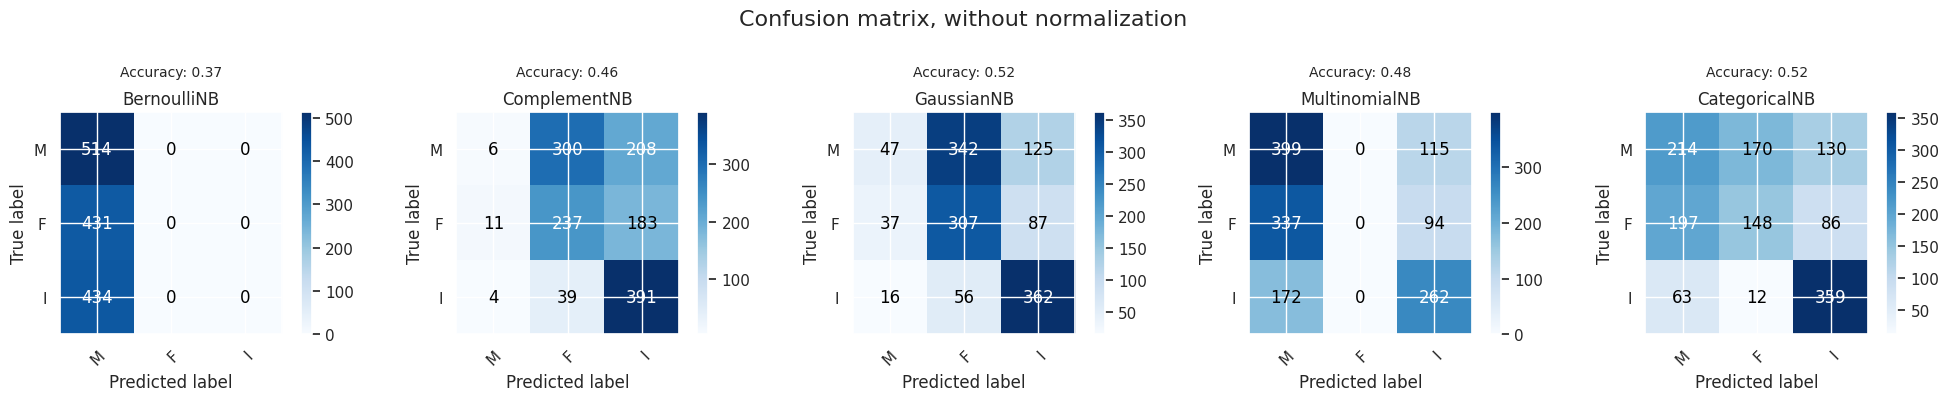

In [ ]:
# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows=1, ncols = len(model_names), figsize = (4*len(model_names),4))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models):

  ##########
  # PASO 2 #
  ##########

  # Transformamos variables categóricas a valores numéricos/enteros
  y_model_array = transform_to_categorical_array(models[idx][2])

  ##########
  # PASO 3 #
  ##########

  # Creamos este array de numpy porque es el parámetro con las clases que espera la función
  classes = np.array(field_categories)
  plot_confusion_matrix(ytest_df[field_name],
                        y_model_array,
                        classes=classes,
                        normalize=False,
                        title=f'Accuracy: {str(round(model[1],2))}',
                        titleSup=model_names[idx],
                        fig=fig,
                        ax=ax[idx%len(model_names)] if len(model_names) > 1 else ax)


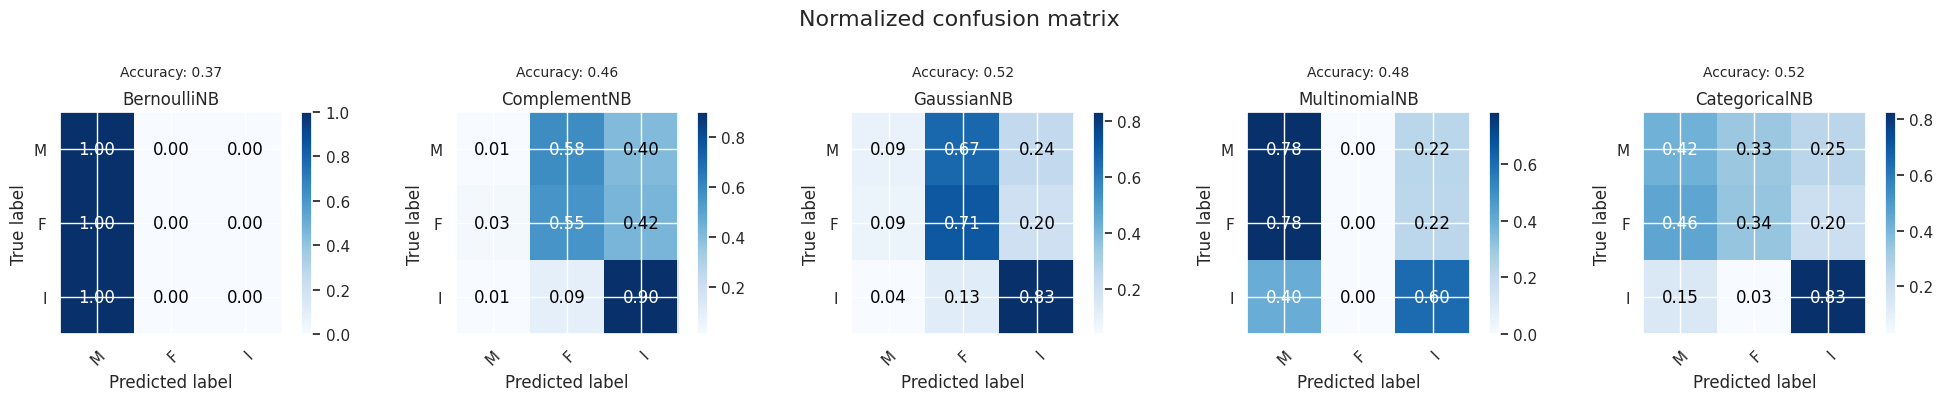

In [ ]:
# Creamos el contenedor para representar los resultados normalizados
fig, ax = plt.subplots(nrows=1, ncols = len(model_names), figsize = (4*len(model_names),4))

# Representamos la matriz de confusión normalizada para cada modelo asignando los parámetros
for idx, model in enumerate(models):

  y_model_array = transform_to_categorical_array(models[idx][2])

  # Creamos este array de numpy porque es el parámetro con las clases que espera la función
  classes = np.array(field_categories)
  plot_confusion_matrix(ytest_df[field_name],
                        y_model_array,
                        classes=classes,
                        normalize=True,
                        title=f'Accuracy: {str(round(model[1],2))}',
                        titleSup=model_names[idx],
                        fig=fig,
                        ax=ax[idx%len(model_names)] if len(model_names) > 1 else ax)